In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from aging.behavior.syllables import relabel_by_usage
from aging.plotting import figure, legend, format_plots
import colorcet as cc

In [2]:
format_plots()

In [3]:
def get_ont_map():
    df = pd.read_parquet(
        "/n/groups/datta/win/longtogeny/data/ontogeny/version_08/ontogeny_males_syllable_df_v00.parquet"
    )
    _, umap = relabel_by_usage(df, return_map=True)
    return umap

In [4]:
umap = get_ont_map()

In [5]:
df = pd.read_parquet(
    "/n/groups/datta/win/longtogeny/data/ontogeny/version_08/klothos_syllable_df_v00.parquet"
)
df["relabeled_syllables"] = df["syllables"].map(umap)
usages = (
    df.query("onsets")
    .groupby(["subject_name", "date"])["relabeled_syllables"]
    .value_counts(normalize=True)
)
usage_mtx = pd.pivot_table(
    usages.reset_index(),
    index=["subject_name", "date"],
    columns="relabeled_syllables",
    values="proportion",
    fill_value=0,
)

In [6]:
velocities = (
    df.groupby(["subject_name", "date"])["velocity_2d_mm"].quantile(0.95).reset_index()
)

In [7]:
def get_session_and_experiment_type(df):
    session_type = []
    exp_type = []
    for idx, row in df.iterrows():
        masks = df.loc[df['subject_name'] == row.subject_name]
        masks.drop(index=idx)
        if masks['date'].iloc[0] < row.date:
            session_type.append('after')
        else:
            session_type.append('before')
        if int(row.subject_name.split('_')[1]) in [2, 4]:
            exp_type.append('klothos')
        else:
            exp_type.append('saline')
    df['session_type'] = session_type
    df['exp_type'] = exp_type
    return df

In [8]:
velocities = get_session_and_experiment_type(velocities)

In [9]:
def zscore(ser):
    return (ser - ser.mean()) / ser.std()

In [10]:
velocities['z_velocity'] = velocities.groupby('exp_type')['velocity_2d_mm'].transform(zscore)

In [11]:
velocities

,subject_name,date,velocity_2d_mm,session_type,exp_type,z_velocity
0,K90M_01_01,2023-12-05 15:33:09,4.570852,before,saline,-0.338414
1,K90M_01_01,2023-12-06 15:26:40,4.763014,after,saline,-0.018267
2,K90M_01_02,2023-12-05 12:33:28,4.697512,before,saline,-0.127395
3,K90M_01_02,2023-12-06 12:28:27,4.253188,after,saline,-0.867649
4,K90M_01_03,2023-12-05 15:33:42,5.477930,before,saline,1.172799
5,K90M_01_03,2023-12-06 15:30:14,4.770215,after,saline,-0.006271
6,K90M_01_04,2023-12-05 12:33:57,4.417081,before,saline,-0.594600
7,K90M_01_04,2023-12-06 12:30:26,3.987987,after,saline,-1.309481
8,K90M_02_01,2023-12-05 16:10:55,4.184984,before,klothos,-0.254791
9,K90M_02_01,2023-12-06 16:17:22,3.851226,after,klothos,-0.752993


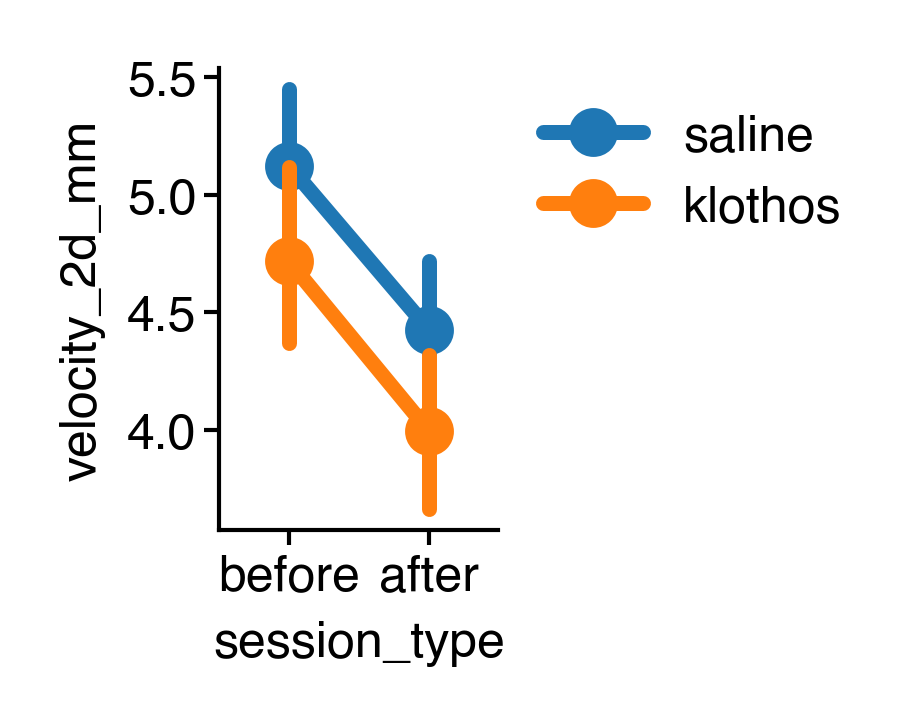

In [35]:
fig = figure(0.6, 1)
ax = sns.pointplot(data=velocities, hue='exp_type', x='session_type', y='velocity_2d_mm')
legend()
sns.despine()

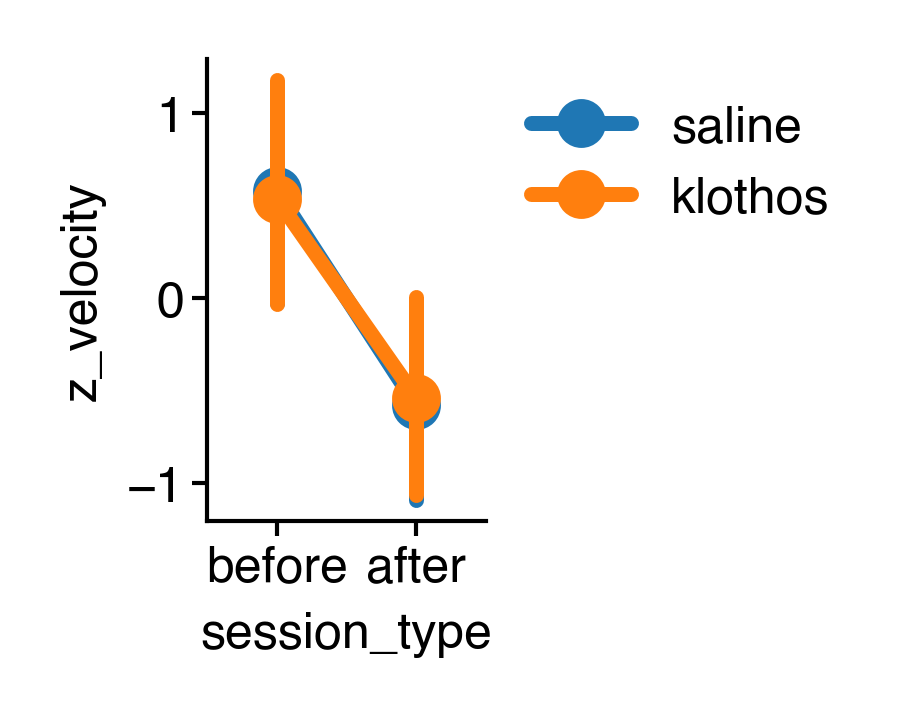

In [36]:
fig = figure(0.6, 1)
sns.pointplot(data=velocities, hue='exp_type', x='session_type', y='z_velocity')
legend()
sns.despine()